![regresion](regresion.png)

## Regresión: Variable Objetivo, Target, Variable dependiente.
#### En un problema de regresión, esta es una variable continua (Numérica)
Ejemplos:
* Calcular el precio de las casas.
* Calcular la nota de egreso de un estudiante.
* Calcular el tiempo que se va a demorar un delivery.

Que cosas no son regresión?
* De que color es esta casa?
* Un alumno vendrá o no a clases?
* Cuál es el producto más idoneo para un cliente de un banco? 

In [279]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import statsmodels.formula.api as smf
import statsmodels.api as sm
import sklearn as sk

In [280]:
df = pd.read_csv('../Clase_2022_07_07/mtcars.csv', index_col = 0)
df.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


<AxesSubplot:xlabel='cyl', ylabel='mpg'>

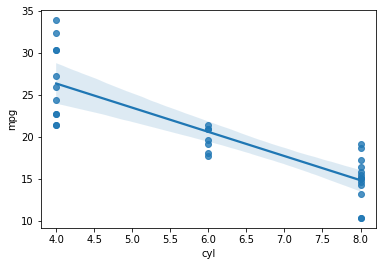

In [281]:
# Supongamos que queremos intentar hacer un modelo respecto al mpg (miles per gallon)
# Approach Explicativo: Regresión Lineal: OLS (Ordinary Least Squares / Minimos cuadrados) .... Se llama así porque intenta reducir el error cuadrático.

sns.regplot(x = 'cyl', y = 'mpg', data = df)

In [282]:
# smf.ols(y ~ x1 + x2 + x3, data = df).fit().summary()
model = smf.ols('mpg ~ cyl', data = df).fit() # acabamos de ajustar nuestro modelo... valores de mis parámetro

![modlin1](ajuste_mod_lineal.png)
![modlin2](ajuste_mod_lineal_2.png)

In [283]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.726
Model:                            OLS   Adj. R-squared:                  0.717
Method:                 Least Squares   F-statistic:                     79.56
Date:                Mon, 18 Jul 2022   Prob (F-statistic):           6.11e-10
Time:                        02:27:57   Log-Likelihood:                -81.653
No. Observations:                  32   AIC:                             167.3
Df Residuals:                      30   BIC:                             170.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     37.8846      2.074     18.268      0.000      33.649      42.120
cyl           -2.8758      0.322     -8.920      0.000      -3.534      -2.217
==============================================================================
Omnibus:                        1.007   Durbin-Watson:                   1.670
Prob(Omnibus):                  0.604   Jarque-Bera (JB):                0.874
Skew:                           0.380   Prob(JB):                        0.646
Kurtosis:                       2.720   Cond. No.                         24.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [284]:
# Medida de ajuste: una manera de medir el performance del modelo. R2: 0 (todo mal) y 1 (perfecto)
# AIC: Criterio de información de Akaike.
# BIC: Criterio de información de Bayes. 
# Sirven para comparar modelos. Menor es mejor. El modelo 1 es mejor que el modelo 2 pero no te dicen si es bueno en general. Es para comparar modelos

# P > |t| es p-value. P-value es una medida de la probabilidad de que el modelo sea bueno.
# Ho : La variable no tiene efecto sobre la variable dependiente....
# H1 : La variable si tiene efecto sobre la variable dependiente....

# Criterio que se utiliza en general es alpha 0.05
# Si p-value < alpha entonces si aceptamos Ho.

# Condition number: un numero muy alto implica Multicolinealidad.
# (Más de una variable tiene la misma info... Correlación entre muchas variables)

![mc](cond_number.png)

[ppt_multicol](https://www.sjsu.edu/faculty/guangliang.chen/Math261a/Ch9slides-multicollinearity.pdf)

In [285]:
# ' + '.join(df.drop('mpg',axis=1).columns.tolist())
model = smf.ols('mpg ~ cyl + disp + hp + drat + wt + qsec + vs + am + gear + carb', data = df).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     13.93
Date:                Mon, 18 Jul 2022   Prob (F-statistic):           3.79e-07
Time:                        02:27:57   Log-Likelihood:                -69.855
No. Observations:                  32   AIC:                             161.7
Df Residuals:                      21   BIC:                             177.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.3034     18.718      0.657      0.518     -26.623      51.229
cyl           -0.1114      1.045     -0.107      0.916      -2.285       2.062
disp           0.0133      0.018      0.747      0.463      -0.024       0.050
hp            -0.0215      0.022     -0.987      0.335      -0.067       0.024
drat           0.7871      1.635      0.481      0.635      -2.614       4.188
wt            -3.7153      1.894     -1.961      0.063      -7.655       0.224
qsec           0.8210      0.731      1.123      0.274      -0.699       2.341
vs             0.3178      2.105      0.151      0.881      -4.059       4.694
am             2.5202      2.057      1.225      0.234      -1.757       6.797
gear           0.6554      1.493      0.439      0.665      -2.450       3.761
carb          -0.1994      0.829     -0.241      0.812      -1.923       1.524
==============================================================================
Omnibus:                        1.907   Durbin-Watson:                   1.861
Prob(Omnibus):                  0.385   Jarque-Bera (JB):                1.747
Skew:                           0.521   Prob(JB):                        0.418
Kurtosis:                       2.526   Cond. No.                     1.22e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.22e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [286]:
## Segunda api

import statsmodels.api as sm ## No voy a utilizar formula, voy a utilizar datasets...add()
x_full = df.drop(columns = 'mpg')
X_full = sm.add_constant(x_full) # Estoy considerando el intercepto cuando ajuste parametros
y_full = df.mpg
model_full = sm.OLS(y_full, X_full).fit()
model_full.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     13.93
Date:                Mon, 18 Jul 2022   Prob (F-statistic):           3.79e-07
Time:                        02:27:57   Log-Likelihood:                -69.855
No. Observations:                  32   AIC:                             161.7
Df Residuals:                      21   BIC:                             177.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.3034     18.718      0.657      0.518     -26.623      51.229
cyl           -0.1114      1.045     -0.107      0.916      -2.285       2.062
disp           0.0133      0.018      0.747      0.463      -0.024       0.050
hp            -0.0215      0.022     -0.987      0.335      -0.067       0.024
drat           0.7871      1.635      0.481      0.635      -2.614       4.188
wt            -3.7153      1.894     -1.961      0.063      -7.655       0.224
qsec           0.8210      0.731      1.123      0.274      -0.699       2.341
vs             0.3178      2.105      0.151      0.881      -4.059       4.694
am             2.5202      2.057      1.225      0.234      -1.757       6.797
gear           0.6554      1.493      0.439      0.665      -2.450       3.761
carb          -0.1994      0.829     -0.241      0.812      -1.923       1.524
==============================================================================
Omnibus:                        1.907   Durbin-Watson:                   1.861
Prob(Omnibus):                  0.385   Jarque-Bera (JB):                1.747
Skew:                           0.521   Prob(JB):                        0.418
Kurtosis:                       2.526   Cond. No.                     1.22e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.22e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Como solucionamos el problema de la multicolinealidad

In [287]:
# VIF: Variance Inflation Factor... Mide el nivel de Colinealidad
#VIF > 10, debería eliminar esa variable

from statsmodels.stats.outliers_influence import variance_inflation_factor

variance_inflation_factor(x_full.to_numpy(), 0) # calcular el VIF de la Variable 0 (cyl)

112.62982779028376

In [288]:
pd.Series([variance_inflation_factor(x_full.to_numpy(), col) for col in range(x_full.shape[1])], index=x_full.columns)

cyl     112.629828
disp     98.930791
hp       56.047781
drat    132.214353
wt      182.948049
qsec    317.534376
vs        8.752581
am        7.412020
gear    119.804879
carb     32.213836
dtype: float64

In [289]:
def VIF(predictors, vars_to_ignore=None):
    x = predictors
    if vars_to_ignore is not None:
        x = x.drop(columns = vars_to_ignore)
        
    output = pd.Series([variance_inflation_factor(x.to_numpy(), col) for col in range(x.shape[1])], index=x.columns)
    return output, output.index
vif, indices = VIF(x_full, vars_to_ignore = ['qsec', 'gear', 'wt', 'cyl','hp','drat'])
vif

disp    4.607189
vs      1.449475
am      2.139760
carb    5.884330
dtype: float64

In [290]:
indices

Index(['disp', 'vs', 'am', 'carb'], dtype='object')

In [291]:
x_col = df[indices]
model_col_noint = sm.OLS(y, x_col).fit()
model_col_noint.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    mpg   R-squared (uncentered):                   0.943
Model:                            OLS   Adj. R-squared (uncentered):              0.934
Method:                 Least Squares   F-statistic:                              115.0
Date:                Mon, 18 Jul 2022   Prob (F-statistic):                    5.95e-17
Time:                        02:27:57   Log-Likelihood:                         -97.022
No. Observations:                  32   AIC:                                      202.0
Df Residuals:                      28   BIC:                                      207.9
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
disp           0.0393      0.008      5.039      0.000       0.023       0.055
vs            13.7415      1.726      7.961      0.000      10.206      17.277
am            11.9478      2.176      5.490      0.000       7.490      16.406
carb          -0.2037      0.712     -0.286      0.777      -1.662       1.255
==============================================================================
Omnibus:                        2.732   Durbin-Watson:                   1.553
Prob(Omnibus):                  0.255   Jarque-Bera (JB):                2.307
Skew:                          -0.548   Prob(JB):                        0.316
Kurtosis:                       2.271   Cond. No.                         668.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [292]:
X_col = sm.add_constant(x_col)
model_col = sm.OLS(y,X_col).fit()
model_col.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     33.41
Date:                Mon, 18 Jul 2022   Prob (F-statistic):           4.29e-10
Time:                        02:27:57   Log-Likelihood:                -73.846
No. Observations:                  32   AIC:                             157.7
Df Residuals:                      27   BIC:                             165.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         26.3692      2.812      9.377      0.000      20.599      32.139
disp          -0.0213      0.008     -2.836      0.009      -0.037      -0.006
vs             1.2077      1.585      0.762      0.453      -2.044       4.460
am             4.1419      1.359      3.048      0.005       1.354       6.930
carb          -1.2679      0.369     -3.433      0.002      -2.026      -0.510
==============================================================================
Omnibus:                        0.071   Durbin-Watson:                   1.769
Prob(Omnibus):                  0.965   Jarque-Bera (JB):                0.103
Skew:                          -0.080   Prob(JB):                        0.950
Kurtosis:                       2.773   Cond. No.                     1.81e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.81e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Eliminar variables Pvalue

In [293]:
x_pvalue = df.drop(columns = ['mpg', 'cyl','vs','carb','gear','drat','disp','hp'])
X_pvalue = sm.add_constant(x_pvalue)

model_pvalue = sm.OLS(y,X_pvalue).fit()
model_pvalue.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     52.75
Date:                Mon, 18 Jul 2022   Prob (F-statistic):           1.21e-11
Time:                        02:27:57   Log-Likelihood:                -72.060
No. Observations:                  32   AIC:                             152.1
Df Residuals:                      28   BIC:                             158.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.6178      6.960      1.382      0.178      -4.638      23.874
wt            -3.9165      0.711     -5.507      0.000      -5.373      -2.460
qsec           1.2259      0.289      4.247      0.000       0.635       1.817
am             2.9358      1.411      2.081      0.047       0.046       5.826
==============================================================================
Omnibus:                        2.574   Durbin-Watson:                   1.714
Prob(Omnibus):                  0.276   Jarque-Bera (JB):                2.213
Skew:                           0.540   Prob(JB):                        0.331
Kurtosis:                       2.297   Cond. No.                         296.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [294]:
display(model_pvalue.pvalues)

display(model_pvalue.aic)

const    0.177915
wt       0.000007
qsec     0.000216
am       0.046716
dtype: float64

152.11937086890117

In [295]:
from sklearn.metrics import r2_score, mean_squared_error
y_pred = model_pvalue.predict(X_pvalue)

def evaluation(model,y ,y_pred):
    print(f'AIC es: {model.aic}')
    print(f'BIC es: {model.bic}')
    print(f'Condition number: {model.condition_number}')
    print(f'R2: {r2_score(y, y_pred)}')
    print(f'RMSE: {mean_squared_error(y, y_pred, squared=False)}') # RMSE: Root Mean Squared Error

preds_full = model_full.predict(X_full)
preds_col_noint = model_col_noint.predict(x_col)
preds_col = model_col.predict(X_col)
preds_pvalue = model_pvalue.predict(X_pvalue)

print('Modelo Completo')
evaluation(model_full, y , preds_full)
print('\nModelo Colinealidad')
evaluation(model_col, y, preds_col)
print('\nModelo Colinealidad sin intercepto')
evaluation(model_col_noint, y, preds_col_noint)
print('\nModelo P Value')
evaluation(model_pvalue, y , preds_pvalue)


Modelo Completo
AIC es: 161.70981043447966
BIC es: 177.83290536527664
Condition number: 12212.766034567672
R2: 0.8690157644777647
RMSE: 2.146904967160944

Modelo Colinealidad
AIC es: 157.691947220004
BIC es: 165.02062673400263
Condition number: 1808.2111551872879
R2: 0.8319067725171021
RMSE: 2.432083122326124

Modelo Colinealidad sin intercepto
AIC es: 202.04477113198624
BIC es: 207.90771474318515
Condition number: 668.2918205540203
R2: 0.2844549941816539
RMSE: 5.017897472209537

Modelo P Value
AIC es: 152.11937086890117
BIC es: 157.9823144801001
Condition number: 296.22932210340383
R2: 0.8496635563617072
RMSE: 2.30004028183239


In [296]:
model_pvalue.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     52.75
Date:                Mon, 18 Jul 2022   Prob (F-statistic):           1.21e-11
Time:                        02:27:57   Log-Likelihood:                -72.060
No. Observations:                  32   AIC:                             152.1
Df Residuals:                      28   BIC:                             158.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.6178      6.960      1.382      0.178      -4.638      23.874
wt            -3.9165      0.711     -5.507      0.000      -5.373      -2.460
qsec           1.2259      0.289      4.247      0.000       0.635       1.817
am             2.9358      1.411      2.081      0.047       0.046       5.826
==============================================================================
Omnibus:                        2.574   Durbin-Watson:                   1.714
Prob(Omnibus):                  0.276   Jarque-Bera (JB):                2.213
Skew:                           0.540   Prob(JB):                        0.331
Kurtosis:                       2.297   Cond. No.                         296.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [297]:
y.mean()

20.090624999999996

In [298]:
X_pvalue; # matriz de predicciones o matriz de diseño

In [299]:
X_pvalue.mean(), 


(const     1.00000
 wt        3.21725
 qsec     17.84875
 am        0.40625
 dtype: float64,)

In [300]:
X_pvalue.std()

const    0.000000
wt       0.978457
qsec     1.786943
am       0.498991
dtype: float64

In [306]:
# todas las variables deben estar en la misma escala para poder interpretarse.
# z_core = (x - mu ) / std
from sklearn.preprocessing import StandardScaler
from feature_engine.wrappers import SklearnTransformerWrapper
#SIEMPRE HAY QUE ESCALAR PARA TENER UNA MEJOR EXPLICACION DEL MODELO
sc = SklearnTransformerWrapper(StandardScaler())
x_pvalue_sc = sc.fit_transform(x_pvalue)
X_pvalue_sc = sm.add_constant(x_pvalue_sc)
X_pvalue_sc

,const,wt,qsec,am
Mazda RX4,1.0,-0.620167,-0.789601,1.208941
Mazda RX4 Wag,1.0,-0.355382,-0.471202,1.208941
Datsun 710,1.0,-0.931678,0.432823,1.208941
Hornet 4 Drive,1.0,-0.002336,0.904736,-0.827170
Hornet Sportabout,1.0,0.231297,-0.471202,-0.827170
Valiant,1.0,0.252064,1.348220,-0.827170
Duster 360,1.0,0.366285,-1.142114,-0.827170
Merc 240D,1.0,-0.028296,1.223135,-0.827170
Merc 230,1.0,-0.069830,2.871986,-0.827170
Merc 280,1.0,0.231297,0.256567,-0.827170


In [302]:
X_pvalue_sc.std()


const    0.000000
wt       1.016001
qsec     1.016001
am       1.016001
dtype: float64

In [303]:
X_pvalue_sc.mean()


const    1.000000e+00
wt      -4.510281e-16
qsec    -1.469311e-15
am       5.551115e-17
dtype: float64

In [304]:
model_sc = sm.OLS(y,X_pvalue_sc).fit()
model_sc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     52.75
Date:                Mon, 18 Jul 2022   Prob (F-statistic):           1.21e-11
Time:                        02:28:25   Log-Likelihood:                -72.060
No. Observations:                  32   AIC:                             152.1
Df Residuals:                      28   BIC:                             158.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         20.0906      0.435     46.221      0.000      19.200      20.981
wt            -3.7718      0.685     -5.507      0.000      -5.175      -2.369
qsec           2.1561      0.508      4.247      0.000       1.116       3.196
am             1.4419      0.693      2.081      0.047       0.022       2.861
==============================================================================
Omnibus:                        2.574   Durbin-Watson:                   1.714
Prob(Omnibus):                  0.276   Jarque-Bera (JB):                2.213
Skew:                           0.540   Prob(JB):                        0.331
Kurtosis:                       2.297   Cond. No.                         2.88
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [305]:
model_pvalue.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     52.75
Date:                Mon, 18 Jul 2022   Prob (F-statistic):           1.21e-11
Time:                        02:29:16   Log-Likelihood:                -72.060
No. Observations:                  32   AIC:                             152.1
Df Residuals:                      28   BIC:                             158.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.6178      6.960      1.382      0.178      -4.638      23.874
wt            -3.9165      0.711     -5.507      0.000      -5.373      -2.460
qsec           1.2259      0.289      4.247      0.000       0.635       1.817
am             2.9358      1.411      2.081      0.047       0.046       5.826
==============================================================================
Omnibus:                        2.574   Durbin-Watson:                   1.714
Prob(Omnibus):                  0.276   Jarque-Bera (JB):                2.213
Skew:                           0.540   Prob(JB):                        0.331
Kurtosis:                       2.297   Cond. No.                         296.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""